# Lista 8 - Verossimilhança

## Introdução

In [2]:
# -*- coding: utf8

from scipy import stats as ss

import matplotlib.pyplot as plt
from numpy.testing import assert_equal
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [3]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

<ipython-input-3-9115da2ed7f4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [1]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

Continuando da aula passada. Vamos ver mais uma forma de entender um modelo de regressão linear. Lembre-se até agora falamos de correlação e covariância cobrindo os seguintes tópicos:

1. Covariância
1. Coeficiente de Pearson (Covariância Normalizada)
1. Coeficiente de Pearson como sendo a fração do desvio de y capturado por x
1. Mínimos Quadrados

Todos os passos acima chegam no mesmo local de traçar a "melhor" reta no gráfico de dispersão. Melhor aqui significa a reta que que minimiza o erro abaixo:

$$\Theta = [\alpha, \beta]$$
$$L(\Theta) = \sum_i (y_i - \hat{y}_i)^2$$
$$L(\Theta) = \sum_i (y_i - (\beta x_i + \alpha))^2$$

Chegamos em:

\begin{align}
 \alpha & = \bar{y} - \beta\,\bar{x}, \\[5pt]
  \beta &= \frac{ \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i=1}^n (x_i - \bar{x})^2 } \\[6pt]
            &= \frac{ \operatorname{Cov}(x, y) }{ \operatorname{Var}(x) } \\[5pt]
            &= r_{xy} \frac{s_y}{s_x}. \\[6pt]
\end{align}

## Visão probabílistica

Vamos aprender uma última forma de pensar na regressão. Em particular, vamos fazer uso de uma visão probabílistica. Para tal, exploraremos o caso dos apartamentos de BH abaixo.

Inicialmente, vamos observar os dados além do resultado da melhor regressão.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/aptosBH.txt', index_col=0)
df['preco'] = df['preco'] / 1000

plt.scatter(df['area'], df['preco'], edgecolors='k', s=80, alpha=0.6)

plt.title('Preço de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')
despine()

O seaborn tem uma função regplot que plota a melhor reta além de um intervalo de confiança.

In [ ]:
sns.regplot(x='area', y='preco', data=df, n_boot=10000,
            line_kws={'color':'magenta', 'lw':4},
            scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.title('Preco de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')
despine()

A reta pode ser recuperada usando scipy.

In [6]:
model = ss.linregress(df['area'], df['preco'])
model

LinregressResult(slope=3.5357191563336516, intercept=200.5236136898945, rvalue=0.694605637960645, pvalue=1.917920339304322e-32, stderr=0.2503210673009473, intercept_stderr=34.36420799322305)

Usando esta reta podemos prever o preço de um apartamento usando apenas a área do mesmo.

In [7]:
beta = model.slope
alpha = model.intercept
novo_apt_area = 225
preco = beta * novo_apt_area + alpha
preco

996.0604238649662

Ou seja, quando um apartamento de 225$m^2$ entra no mercado o mesmo custa em torno de 1M de reais.

## Erros Normais

Agora, será que conseguimos chegar no mesmo pensando na regressão como um modelo probabilístico?

Ao invés de focar no valor quadrático do erro, vamos pensar no caso ideal. Qual seria o valor ideal do erro da minha regressão? ZERO! Porém, isso é possível somente quando temos relações lineares perfeitas (ex: x = altura em cm, y = altura em polegadas), o que não é o caso geral.

Nesse caso, vamos assumir que:
$$\epsilon_i \sim Normal(0, \sigma^2)$$

Isto é, cada um dos erros vem de uma distribuição normal com média 0. Ou seja, a média dos erros ainda vai ser uma normal centrada em 0. Além disso, o desvio padrão dos erros poderão ser estimados através dos dados após a regressão.


## Verossimilhança

Na regressão, queremos prever o valor de $y$ em função de $x$. No exemplo mostrado acima, queremos prever o preço de compra de um apartamento em BH em função da área.

Estamos assumindo que:
$$\epsilon_i = x_i - \beta x_i - \alpha$$

Ou seja, um erro na estimativa de um ponto não depende de outros.

Temos uma função de densidade de probabilidade para os erros:
$$\epsilon_i \sim Normal(0, \sigma^2)$$

Observe a função de densidade da Normal:
$$p(x|\mu, \sigma^2) = \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$$

Logo:
$$p(\epsilon_i|\mu, \sigma^2) = \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(\epsilon_i-\mu)^2}{2 \sigma^2}}$$

Como no nosso modelo a média é zero, ficamos com:
$$p(\epsilon_i|\mu=0, \sigma^2) = \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{\epsilon_i^2}{2 \sigma^2}}$$
$$p(\epsilon_i|\sigma^2, \alpha, \beta) = \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}}$$

A probabilidade mostrada acima é a probabilidade de uma observação (observar o erro $\epsilon_i$) dado os parâmetros $\sigma^2$, $\alpha$ e $\beta$!  
Isto é uma **verossimilhança**!

O gráfico abaixo mostra a distribuição de probabilidade para erros vindos de uma distribuição normal com média igual a zero e desvio padrão igual a um.

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, ss.distributions.norm.pdf(x, scale=1))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma=1)$')

despine()

Um modelo estatístico na mais é do que um conjunto de hipóteses que se supõem válidas para a distribuição de probabilidades das variáveis aleatórias medidas na amostra.

Em particular, aqui estamos falando de modelos paramétricos, onde assumimos que o erro é uma normal e assumimos uma função de densidade (como mostrado no gráfico acima).

Vamos focar numa base de 3 pontos. Além do mais, vamos assumir uma reta qualquer, dessa forma, o desvio padrão dos erros podem ser estimados através dos dados após a regressão. Se os erros vem de uma distribuição normal com função de densidade já conhecida, qual dos três erros abaixo é o mais verossímil?

Observe:
$$p(\epsilon_i|\sigma^2, \alpha, \beta) = \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}}$$

Quanto menor o erro, maior a probabilidade, sendo assim, o segundo erro é o mais verossímil.



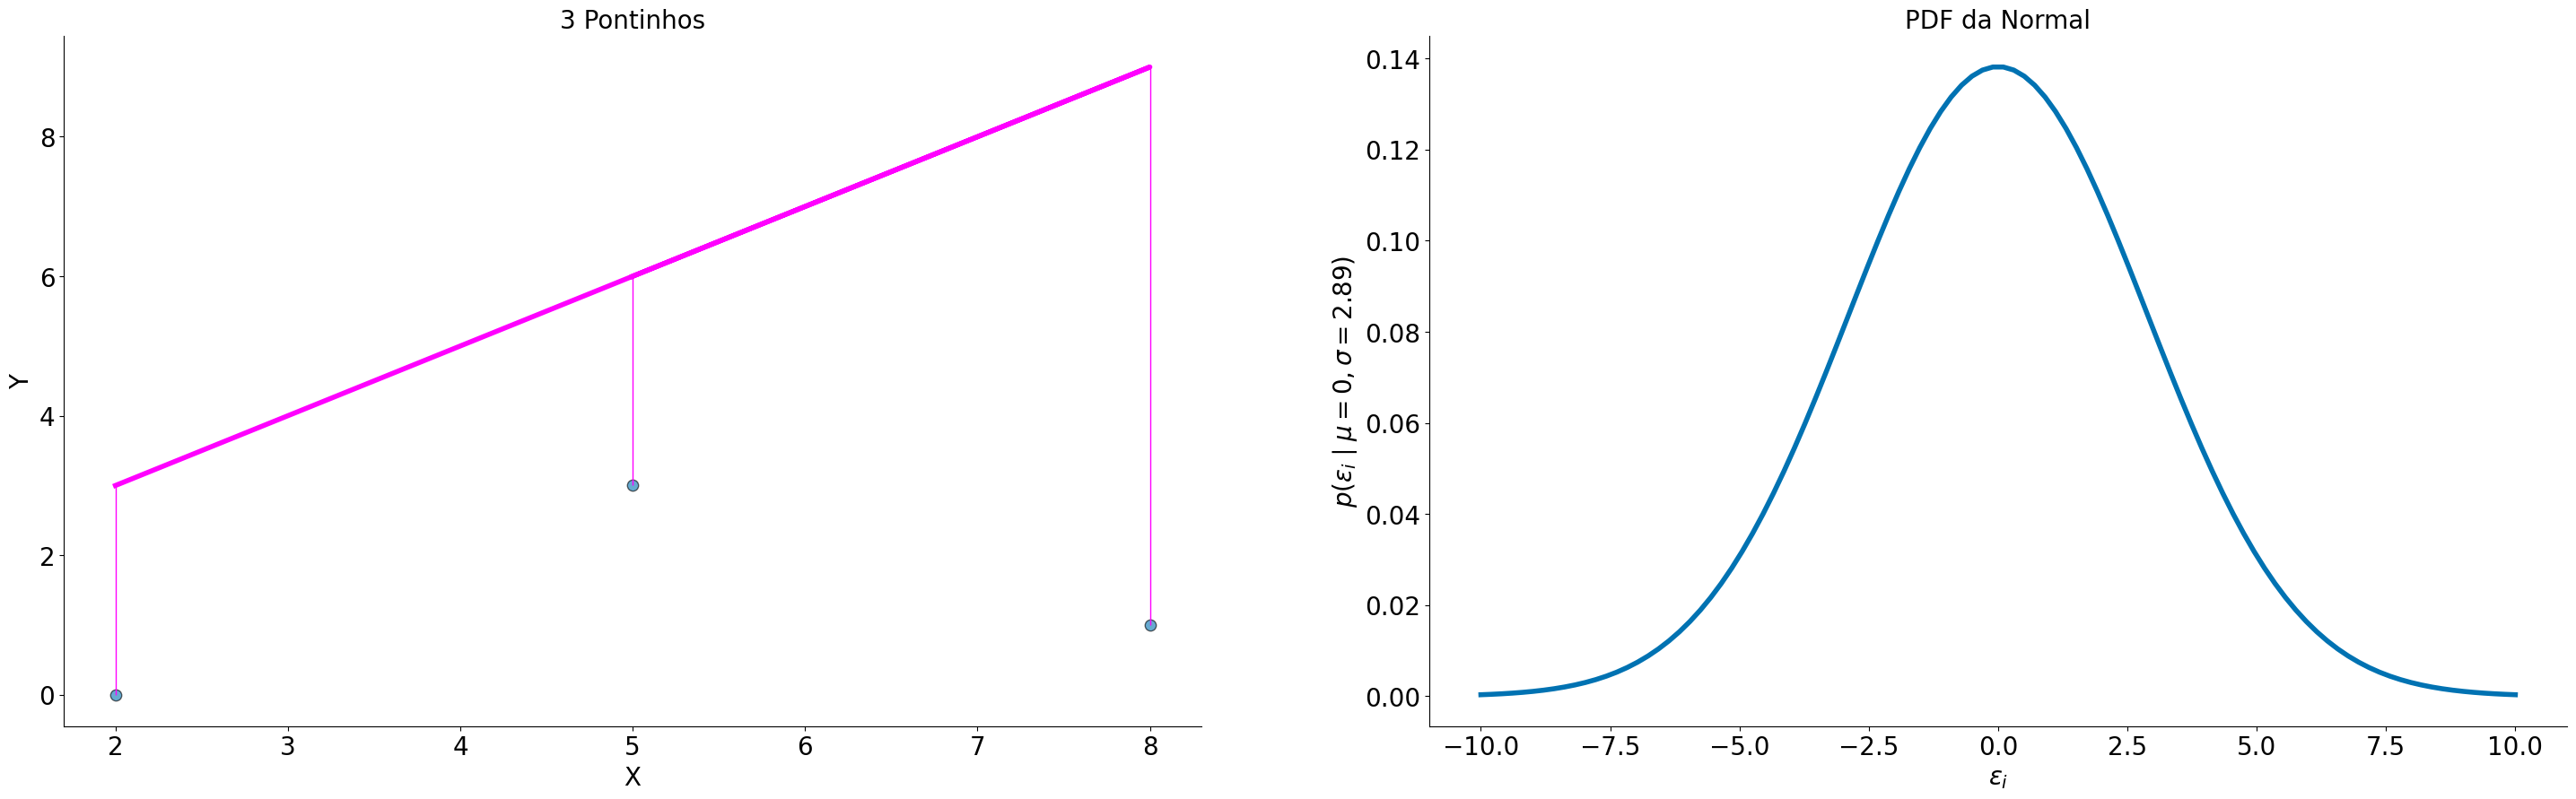

In [9]:
beta = 1
alpha = 1

fig = plt.figure(figsize=(36, 10))

x = np.array([2, 8, 5])
y = np.array([0, 1, 3])

plt.subplot(121)
plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('3 Pontinhos')
plt.ylabel(r'Y')
plt.xlabel(r'X')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

plt.subplot(122)
plt.title('PDF da Normal')
ei_x = np.linspace(-10, 10, 100)
sigma = (y - y_bar).std(ddof=1)
plt.plot(ei_x, ss.distributions.norm.pdf(ei_x, scale=sigma))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma={})$'.format(np.round(sigma, 2)))
despine()

Observe o exemplo considerando agora todos os pontos do exemplo de predição de preço de apartamentos em BH.

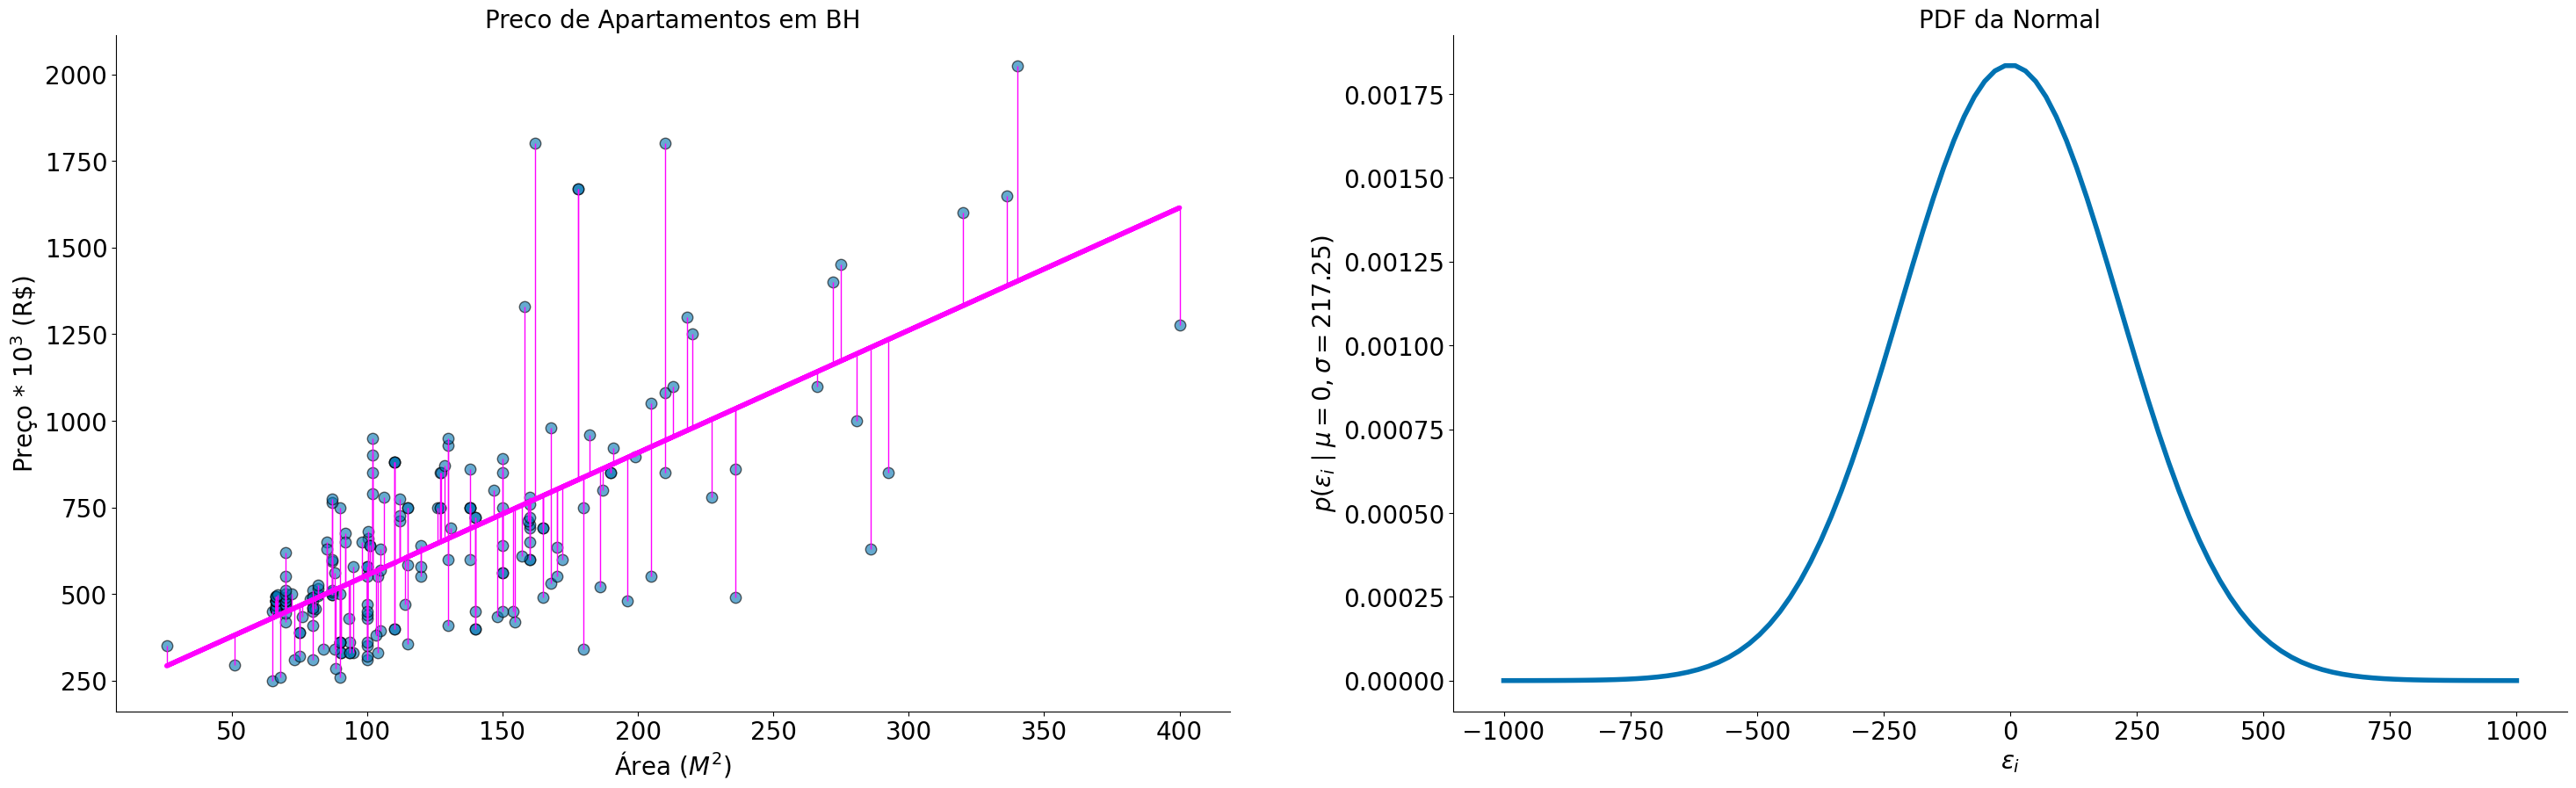

In [10]:
beta = 3.535719156333653
alpha = 200.52361368989432

fig = plt.figure(figsize=(36, 10))

x = df['area']
y = df['preco']

plt.subplot(121)
plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('Preco de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

plt.subplot(122)
plt.title('PDF da Normal')
ei_x = np.linspace(-1000, 1000, 100)
sigma = (y - y_bar).std(ddof=1)
plt.plot(ei_x, ss.distributions.norm.pdf(ei_x, scale=sigma))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma={})$'.format(np.round(sigma, 2)))
despine()

## Erros Independentes

Nos exemplos acima discutimos sobre qual erro é o mais verossímil... Mas como podemos calcular a verossimilhança de todos os erros?

Ao assumir **independência**, estamos dizendo que:
$$p(E|\sigma^2, \alpha, \beta) = \prod_i p(\epsilon_i|\sigma^2, \alpha, \beta) = \prod_i p(\epsilon_i|\theta)$$
onde $E = \{e_1, e_2, ..., e_n\}$ e $\theta = \{\sigma^2, \alpha, \beta\}$


Acabamos de definir nossa primeira função de verossimilhança. Como podemos proceder agora? Maximizando a mesma! Ou seja, queremos os parâmetros ($\theta$) que melhor se ajustam os nossos dados.
Porém, maximizar produtórios é chato... O mundo das somas é mais bacana do que o mundo da multiplicação.

## Log-verossimilhança

Como o log é uma função monotonicamente crescente, maximizar o log(f(x)) é equivalente a maximizar f(x). Portanto vamos trabalhar no log.

Ao invés de maximizar a função de **verossimilhança** $L(\theta)$, vamos maximizar a função de **log-verossimilhança** $l(\theta)$:

$$L(\theta) = \prod_i p(\epsilon_i|\theta)$$
$$log(L(E|\theta)) = log(\prod_i p(\epsilon_i|\theta))$$
$$l(\epsilon_i|\theta) = \sum_i log(p(\epsilon_i|\theta))$$
uma vez que $log(A*B) = log(A) + log(B)$.

Substituindo os parâmetros $\sigma^2$, $\alpha$, $\beta$ nas funções e fazendo algumas manipulações, temos que a verossimilhança e a log-verossimilhança são dadas por:

$$L(E|\theta) = \prod_i \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}}$$

$$l(E|\theta) = -nlog(\sqrt{2\pi}) -nlog(\sigma) - \frac{\sum_i (y_i - \beta x_i - \alpha)^2}{2 \sigma^2}$$

* A partir da fórmula da verossimilhança, dada por:
$$L(E|\theta) = \prod_i \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}}$$
verifique que a expressão da log-verossimilhança é dada por:
$$l(E|\theta) = -nlog(\sqrt{2\pi}) -nlog(\sigma) - \frac{\sum_i (y_i - \beta x_i - \alpha)^2}{2 \sigma^2}$$

$$L(E|\theta) = \prod_i \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}}$$
$$log(L(E|\theta)) = log(\prod_i \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}})$$
$$l(\epsilon_i|\theta) = \sum_i log(\frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}})$$
uma vez que $log(A*B) = log(A) + log(B)$.
$$l(\epsilon_i|\theta) = \sum_i log(\frac{1}{\sqrt{\sigma^2 2 \pi}}) + \sum_i log(e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}})$$
$$l(\epsilon_i|\theta) = n log(\frac{1}{\sqrt{\sigma^2 2 \pi}}) + \sum_i log(e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}})$$
$$l(\epsilon_i|\theta) = n log(\frac{1}{\sqrt{\sigma^2 2 \pi}}) - \frac{\sum_i (y_i - \beta x_i - \alpha)^2}{2 \sigma^2}$$
uma vez que $log(A^x) = x log(A)$ e $log(e) = 1$.
$$l(\epsilon_i|\theta) = - n log(\sqrt{\sigma^2 2 \pi}) - \frac{\sum_i (y_i - \beta x_i - \alpha)^2}{2 \sigma^2}$$
uma vez que $log(\frac{1}{x}) = - log(x)$.
$$l(\epsilon_i|\theta) = - n log(\sqrt{2 \pi}) - n log(\sqrt{\sigma}) - \frac{\sum_i (y_i - \beta x_i - \alpha)^2}{2 \sigma^2}$$

Maximizar a log verossimilhança implica em achar os parâmetros que melhor se ajustam aos dados. Além disso, lembre-se que maximizar é achar o local onde a derivada é zero.

Para isso, devemos resolver as derivadas em relação a cada um dos parâmetros: $\sigma$, $\alpha$ e $\beta$.

$$\alpha = \bar{y} - \beta \bar{x}$$
$$\beta = \frac{ \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i=1}^n (x_i - \bar{x})^2 }$$
$$\sigma^2 = \frac{\sum_i (y_i - \beta x_i - \alpha)^2}{n}$$

Observe que ao maximizar $\sigma$, chegamos no estimador da variância. Além disso, o $\sigma$ não impacta os valores de $\alpha$ e $\beta$, mas é útil para entendermos os erros do estimador (é a variância dos erros afinal).

Por fim, note que maximizar a verossimilhança da regressão é o mesmo que minimizar os erros quadrados.


## Estimação da Máxima Verossimilhança e Mínimos Quadrados

Por que escolher os mínimos quadrados? Uma justificativa envolve a estimativa de máxima verossimilhança.

Imagine que temos uma amostra de dados $v_1, \cdots, v_n$ que vem de uma distribuição que depende de algum parâmetro desconhecido $\theta$:

$$p(v_1, \cdots, v_n~|~\theta)$$

Se não conhecêssemos theta, poderíamos nos virar e pensar nessa quantidade como a probabilidade de $\theta$ dada a amostra:

$$L(\theta~|~v_1, \cdots, v_n)$$

Sob essa abordagem, o mais provável $\theta$ é o valor que maximiza essa função de verossimilhança; isto é, o valor que torna os dados observados os mais prováveis. No caso de uma distribuição contínua, na qual temos uma função de distribuição de probabilidade e não uma função de massa de probabilidade, podemos fazer a mesma coisa.

De volta à regressão. Uma suposição que muitas vezes é feita sobre o modelo de regressão simples é que os erros de regressão são normalmente distribuídos com média $0$ e algum desvio padrão (conhecido) $\sigma$. Se esse for o caso, a probabilidade baseada em ver um par $(x_i, y_i)$ é:

$$L(\alpha, \beta~|~x_i, y_i, \sigma) = \frac{1}{\sqrt{2\pi\sigma}}\exp{\big(\frac{-(y_i-\alpha-\beta x_i)^2}{2\sigma^2}\big)}$$

A probabilidade baseada em todo o conjunto de dados é o produto das probabilidades individuais, que é maior precisamente quando alfa e beta são escolhidos para minimizar a soma dos erros quadrados. Ou seja, nesse caso (e com essas suposições), minimizar a soma dos erros quadrados é equivalente a maximizar a probabilidade dos dados observados.

## Qualidade da regressão

Após encontrar os parâmetros do modelo que melhor se ajustam aos dados (minimizam os erros quadrados, maximizam a verossimilhança), devemos avaliar a qualidade do ajuste. A qualidade da regressão pode ser analisada através de gráficos ou métricas, como o R-quadrado, estudado anteriormente.


## Gráfico residual

O gráfico residual é uma forma de visualizar os erros versus a variável preditora para verificar a pressuposição de que os erros são aleatoriamente distribuídos e têm variância constante. De maneira ideal, os pontos devem cair aleatoriamente em ambos os lados de 0, sem padrões reconhecíveis nos pontos. Como os erros são centrados em zero, ao plotar valor de x pelo erro queremos pontos igualmente dispersados  positivos e negativos.
Lembre-se da PDF da distribuição normal. A mediana e a média são iguais, ou seja, 50% dos erros se concentram acima de 0 e 50% abaixo.

Observe o gráfico residual para o exemplo de prever o preço de um apartamento usando apenas a área do mesmo. No eixo-x temos a área do aparatamento e no eixo-y o erro. O gráfico não parece ter um padrão (é o que queremos) já que os erros estão espalhados em ambos os lados da linha tracejada que marca o erro igual a 0. Entretanto, os erros aparentam ser piores quando a área dos apartamentos (variável x) aumenta.


In [ ]:
sns.residplot(x='area', y='preco', data=df,
              line_kws={'color':'magenta', 'lw':4},
              scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.ylabel(r'$\epsilon_i$')
plt.xlabel(r'Área ($M^2$)')
despine()

## QQ Plot

Por fim, outra forma de verificar se o modelo é bom se chama QQ Plot.
Esse gráfico é útil para checar a adequação da distribuição de frequência dos dados à uma distribuição de probabilidades. No caso dos modelos de regressão, o QQ Plot é usado para verificar se os erros apresentam distribuição normal.

Uma forma de construir o QQ Plot consiste em ordenar os erros (eixo-y), comparando com o local esperado do mesmo no modelo (distribuição normal). Nesse caso, a mediana fica no centro do plot. O erro mediano é zero caso a normal seja verdadeira!

Outra forma de construir o QQ Plot consiste em pegar o valor z-norm que leva para a probabilidade de cada um dos erros ordenados no modelo e plotar os erros ordenados no eixo-y e os valores z-normalizados no eixo-x. O gráfico abaixo apresenta o QQ Plot do exemplo de prever o preço de um apartamento usando apenas a área do mesmo.

Idealmente quanto mais próximo de uma reta melhor, uma vez que a reta quer dizer que os erros são perfeitamente normais. Sendo assim, na regressão perfeita observamos uma linha reta no QQ plot.

In [ ]:
ss.probplot(y - y_bar, plot=plt.gca());

## Exercícios - Outros datasets

### Enunciado

Abaixo estão listados algumas conjuntos de dados contendo relações entre variáveis:

**Supernovas**: Atualmente, uma das teorias mais aceitas sobre a formação do universo, diz que o universo está em constante expansão. Supernovas são estrelas que explodiram e morreram recentemente. Os dados contêm registros dessas supernovas. Cada linha na tabela corresponde a uma supernova próxima da Terra observada por astrônomos, indicando o quão longe da Terra a supernova estava e o quão rápido ela se afastava.

**Stocks and Unemployment**: A Bolsa está diretamente ligada à economia do país e do mundo. Quando ela desaba, isso pode ter consequências negativas até no dia a dia de quem nem sabe como a Bolsa funciona. Por exemplo, o desemprego pode aumentar e a inflação, acelerar, tornando os produtos no supermercado mais caros. Com base nisso, os dados apresentam a evolução no preço de uma ação e a taxa de desemprego em determinado período.

**Stocks and Interest**: Além de relacionar o valor de ações na Bolsa com o índice de desemprego, é possível correlacionar o valor das ações e outros indicadores. Os dados apresentam a evolução no preço de uma ação e a taxa de juros em determinado período.


**Dugongs**: Os dados incluem informações de peixe-bois. Cada linha contém o comprimento e a idade de indivíduos. A base de dados é muito utilizada para fazer predições do comprimento desses animais de acordo com a idade.

- **Exercício:** Para cada um dos datasets você deverá:

    1. Carregar os dados do arquivo.  
    2. Fazer uma regressão linear.  
    3. Avaliar a qualidade do modelo através do cálculo do $R^2$ e dos gráficos de erros: Gráfico residual e QQ Plot.  
    4. Verificar se os erros são independentes. Para isso, conte quantos erros são maiores e quantos são menores do que zero.

Antes de realizar o exercício, é útil você definir as seguintes funções com base nos parâmetros citados em cada uma:

Note que após definir as funções pedidas corretamente até o fim do primeiro dataset, os demais irão executar sem erros, não precisando ser alterados.

In [21]:
def error(alpha, beta, x, y):
    return y - (alpha + beta * x)

def sum_of_squared_errors(alpha, beta, x, y):
    errors = error(alpha, beta, x, y)
    return np.sum(errors ** 2)

def total_sum_of_squares(y):
    return np.sum((y - np.mean(y)) ** 2)

def r_squared(alpha, beta, x, y):
    sse = sum_of_squared_errors(alpha, beta, x, y)
    sst = total_sum_of_squares(y)
    return 1 - (sse / sst)

### 1. Supernovas

#### 1.1 Carregar os dados

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/close_novas.csv')
x = df['Distance (million parsecs)']
y = df['Speed (parsecs/year)']

#### 1.2 Regressão Linear

In [18]:
def linear_regression(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  beta = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
  alpha = y_mean - beta * x_mean

  return alpha, beta

In [19]:
(a1, b1) = linear_regression(x,y)
assert_equal(round(a1, 6), 0.000167)
assert_equal(round(b1, 6), 0.000068)

#### 1.3 Avaliação do Modelo via R²


In [22]:
# avaliacao do Rsquared
r2 = r_squared(a1, b1, x, y)
assert_equal(round(r2, 4), 0.9645)

In [ ]:
# avaliacao via grafico dos residuos (sem correcao automatica)
plt.figure(figsize=(10, 5))
sns.residplot(x=x, y=y, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Distance (million parsecs)')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# GABARITO GRAFICO
# sns.residplot(x='Distance (million parsecs)', y='Speed (parsecs/year)', data=df,
#               line_kws={'color':'magenta', 'lw':4},
#               scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
# plt.ylabel(r'$\epsilon_i$')
# despine()
# plt.show()

#### 1.4 Verificando se os erros são independentes

In [29]:
def error_verification(alpha, beta, x, y):
  errors = error(alpha, beta, x, y)
  errors_greater_than_zero = np.sum(errors > 0)
  errors_less_than_zero = np.sum(errors < 0)
  return errors_greater_than_zero, errors_less_than_zero

In [35]:
(maiores, menores) = error_verification(a1, b1, x, y)
assert_equal(maiores, 78)
assert_equal(menores, 78)

In [ ]:
# avaliacao via grafico dos residuos (sem correcao automatica)
ss.probplot(y - y.mean(), plot=plt)
despine()
plt.show()
# gabarito a seguir

In [ ]:
# ss.probplot(y - y.mean(), plot=plt)
# despine()
# plt.show()

### 2. Stocks anad Unemployment

#### 2.1 Carregar os dados

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/stocks_unemployment.csv')
x = df['Unemployment_Rate']
y = df['Stock_Index_Price']

#### 2.2 Regressão Linear

In [39]:
(a2, b2) = linear_regression(x,y)
assert_equal(round(a2, 6), 4471.339321)
assert_equal(round(b2, 6), -588.962076)

#### 2.3 Avaliação do Modelo via R²


In [40]:
# avaliacao do Rsquared
r2 = r_squared(a2, b2, x, y)
assert_equal(round(r2, 4), 0.8507)

In [ ]:
# avaliacao via grafico dos residuos (sem correcao automatica)

# seu codigo aqui
# gabarito a seguir
plt.figure(figsize=(10, 5))
sns.residplot(x=x, y=y, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Stocks and Unemployment')
plt.xlabel('Unemployment Rate')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# GABARITO GRAFICO
sns.residplot(x='Unemployment_Rate', y='Stock_Index_Price', data=df,
              line_kws={'color':'magenta', 'lw':4},
              scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.ylabel(r'$\epsilon_i$')
despine()
plt.show()

#### 2.4 Verificando se os erros são independentes

In [43]:
(maiores, menores) = error_verification(a2, b2, x, y)
assert_equal(maiores, 13)
assert_equal(menores, 11)

In [ ]:
# avaliacao via grafico dos residuos (sem correcao automatica)
ss.probplot(y - y.mean(), plot=plt)
despine()
plt.show()

In [ ]:
# ss.probplot(y - y.mean(), plot=plt)
# despine()
# plt.show()

### 3. Stocks and Interest

#### 3.1 Carregar os dados

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/stocks_interest.csv')
x = df['Interest_Rate']
y = df['Stock_Index_Price']

#### 3.2 Regressão Linear

In [46]:
(a3, b3) = linear_regression(x,y)
assert_equal(round(a3, 6), -99.464319)
assert_equal(round(b3, 6), 564.203892)

#### 3.3 Avaliação do Modelo via R²


In [47]:
# avaliacao do Rsquared
r2 = r_squared(a3, b3, x, y)
assert_equal(round(r2, 4), 0.8757)

In [ ]:
# avaliacao via grafico dos residuos (sem correcao automatica)
plt.figure(figsize=(12, 5))
sns.residplot(x=x, y=y, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Stocks and Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# GABARITO GRAFICO
sns.residplot(x='Interest_Rate', y='Stock_Index_Price', data=df,
              line_kws={'color':'magenta', 'lw':4},
              scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.ylabel(r'$\epsilon_i$')
despine()
plt.show()

#### 3.4 Verificando se os erros são independentes

In [52]:
(maiores, menores) = error_verification(a3, b3, x, y)
assert_equal(maiores, 12)
assert_equal(menores, 12)

In [ ]:
# avaliacao via grafico dos residuos (sem correcao automatica)
ss.probplot(y - y.mean(), plot=plt)
despine()
plt.show()

In [ ]:
# ss.probplot(y - y.mean(), plot=plt)
# despine()
# plt.show()

### 4. Dugongs

#### 4.1 Carregar os dados

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/dugongs.csv')
x = df['Age']
y = df['Length']

#### 4.2 Regressão Linear

In [56]:
(a4, b4) = linear_regression(x,y)
assert_equal(round(a4, 6), 2.018286)
assert_equal(round(b4, 6), 0.028955)

#### 4.3 Avaliação do Modelo via R²


In [57]:
# avaliacao do Rsquared
r2 = r_squared(a4, b4, x, y)
assert_equal(round(r2, 4), 0.6883)

In [ ]:
# avaliacao via grafico dos residuos (sem correcao automatica)
plt.figure(figsize=(10, 5))
sns.residplot(x=x, y=y, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Dugongs')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# GABARITO GRAFICO
# sns.residplot(x='Age', y='Length', data=df,
#               line_kws={'color':'magenta', 'lw':4},
#               scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
# plt.ylabel(r'$\epsilon_i$')
# despine()
# plt.show()

#### 4.4 Verificando se os erros são independentes

In [61]:
(maiores, menores) = error_verification(a4, b4, x, y)
assert_equal(maiores, 16)
assert_equal(menores, 11)

In [ ]:
# avaliacao via grafico dos residuos (sem correcao automatica)
ss.probplot(y - y.mean(), plot=plt)
despine()
plt.show()

In [ ]:
# ss.probplot(y - y.mean(), plot=plt)
# despine()
# plt.show()

## Estimador de Máxima Verossimilhança

Conforme vimos, a verossimilhança representa a probabilidade dos nossos dados $X$ (ou erros $E$) condicionados em um modelo. O modelo aqui são os parâmetros $\theta$ e a função de probabilidade $p$.

$$X = \{x_1, x_2, ..., x_n\}$$

$$p(X|\theta) = \prod_i p(x_i|\theta)$$

No modelo que estudamos:

$\epsilon_i \sim Normal(0, \sigma^2)$  

$p(\epsilon_i|\sigma^2, \alpha, \beta) = \frac{1}{\sqrt{\sigma^2 2 \pi}} e^{-\frac{(y_i - \beta x_i - \alpha)^2}{2 \sigma^2}}$  

$E = \{e_1, e_2, ..., e_n\}$ e $\theta = \{\sigma^2, \alpha, \beta\}$  

$p(E|\theta) = \prod_i p(\epsilon_i|\theta)$

Entretanto, podemos estimar os parâmetros de qualquer modelo probabilístico.

Imagine o seguinte caso, em que observamos variáveis categóricas $X$. $X$ corresponde ao efeito do remédio em um grupo de pessoas, onde cada $x_i$ assume valo igual a 1, caso o remédio tenha funcionado e 0 caso contrário. Por exemplo: $X = \{1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0\}$

Podemos modelar estes dados a partir de uma distribuição [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution). Ou seja,  $x_i \sim Bernoulli(\theta)$ onde $\theta$ representa a probabilidade do remédio funcionar para o paciente (probabilidade de sucesso).

* Derive o estimador de máxima verossimilhança para a distribuição Bernoulli.

$$x_i \sim Bernoulli(\theta)$$

$$p(x_i|\theta) = \theta^{x_i} (1-\theta)^{(1 - x_i)}$$

Estimador de máxima verossimilhança:

$$L(X|\theta) = \prod_i p(x_i|\theta) = \prod_i \theta^{x_i} (1-\theta)^{(1 - x_i)} = \theta^{\sum_i x_i} (1-\theta)^{\sum_i (1 - x_i)}$$
lembrando que $a^x b^y * a^z b^w = a^{x+z} b^{y+w}$


Estimador de máxima log-verossimilhança:

$$l(X|\theta) = log(\prod_i p(x_i|\theta)) = \sum_i log(\theta^{x_i} (1-\theta)^{(1 - x_i)}) = \sum_i x_i log(\theta) + \sum_i (1-x_i) log(1-\theta)$$
lembrando que $log(ab) = log(a) + log(b)$ e $log(a^x) = xlog(a)$

* Após derivar o estimador de máxima verossimilhança para a distribuição Bernoulli encontre o valor de $\theta$ que maximiza a verossimilhança.

Assumimos que as observações são independentes, maximizar a log da verossimilhança corresponde a derivar essa função, encontrando o seu ponto de máximo. Igualando a derivada da log-verossimilhança encontramos os parâmetros ótimos:

$$\frac{\partial l(X|\theta)}{\theta} = \frac{\partial (\sum_i x_i log(\theta) + \sum_i (1-x_i) log(1-\theta))}{\partial \theta} = \frac{\sum_i x_i}{\theta} - \frac{\sum_i (1-x_i)}{(1-\theta)}$$
Lembrando que $\frac{\partial log(a)}{\partial a} = \frac{1}{a}$ e $\frac{\partial log(1-a)}{\partial a} = \frac{1}{(1-a)}$

Igualando a derivada a zero, encontramos o valor de $\theta$ que maximiza a log-verossimilhança:

$$\frac{\sum_i x_i}{\theta} - \frac{\sum_i (1-x_i)}{(1-\theta)} = 0$$
$$(1-\theta) \sum_i x_i = \theta \sum_i (1-x_i)$$
$$\sum_i x_i - \theta \sum_i x_i = n\theta - \theta \sum_i x_i$$
$$\sum_i x_i = n\theta$$
$$\theta = \frac{\sum_i x_i}{n}$$
